## Content

- **Backpropagation in N layered NN**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")

# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 14.9MB/s]


Now, let's get back to our NN network

<center><img src='https://drive.google.com/uc?id=1PWWndBIY0xFSxY7E06DEoTH9-JNuZryf' width="700"></center>



#### How'll computational graph look for above NN ?

<center><img src='https://drive.google.com/uc?id=1AN7oW_aSWmGb8PeQS8xtlytsqI0YZUUT' width="700"></center>



### Forward Propagation

Now, we need to calculate Z1,
- for this we multiply each row of X with each column of W1
- add bias to it (using broadcasting)


The formulation comes out to be:

$$X.W + b$$

In [ ]:
import numpy as np
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

Let;s intitialise these matrices randomly.

In [ ]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [ ]:
Z1 = np.dot(X, W1) + b1 # (300,2) x (2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) # ReLU if Z1 < 0 A1 =0 else A1 = Z1

#### Calculation Z2 and A2

Now, in order to get shape of (300,3)
- we need to multiply $A_1$ with $W^2$ and add bias $b^2$ to it


In [ ]:
Z2 = np.dot(A1, W2) + b2  # (300, 4) x (4, 3) + (1, 3) => (300, 3)
# Applying softmax function to get A2
Z2_exp = np.exp(Z2)
A2 = Z2_exp/np.sum(Z2_exp, axis=1, keepdims=True)
probs = A2

- Notice that the only change from before is one extra line of code.
- We first compute the hidden layer representation and considered that as an input to the output layer.

<center><img src='https://drive.google.com/uc?id=1DQslNtKXMEvwHd5xCplRiiORyEEIIugt' width="700"></center>



### Loss

#### Question: Will the loss change?

No

### Backpropagation

#### Will the gradient calculation change?

No, but, we would have to backpropagate the gradients for one additional layer.

In [ ]:
# Number of training examples
m = y.shape[0] # 300 datapoints

#### Calculating dz2

<center><img src='https://drive.google.com/uc?id=1F8bmELjo3Wb4gOltpB1dsditiw68E9wo' width="700"></center>



$$dZ_2 = \frac{∂L}{∂Z_2}$$


So,

$$\frac{∂L}{∂Z_2} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}$$

Here, $A_2$ is our output probabilities.
- Replaceing $A_2$ with $p$

$$\frac{∂L}{∂Z_2} = \frac{∂L}{∂p}.\frac{∂p}{∂Z_2}$$

#### Doesn't this look familiar ?

- This is similar to what we calculated previously i.e derivative of Loss w.r.t to Z

$$dz=\frac{\partial J}{\partial p} \frac{\partial p}{\partial z}$$

- The derivative came out to be : $dz = (p_i - I (i=y))$


Hence, $dZ_2 = (p_i - I (i=y))$




In [ ]:
dZ2 = probs
dZ2[range(m),y] -= 1

#### What will be the shape of dZ2 ?

As dZ2 is same as probabilties,
- its shape will be (m,3) or (300, 3)

#### Calculating $dW^2$ and $db^2$

Gradient calculation for $dW^2$ and $db^2$ will also be similar to $dW$ and $db$ in the softmax classifier case

<center><img src='https://drive.google.com/uc?id=1pyy0nm9bRONADdWGYmEJCtC3Y7gRiWTJ' width="700"></center>



$$dW_2 = \frac{∂L}{∂W^2} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂W^2}$$

$$= dZ_2.\frac{∂Z_2}{∂W^2}$$

Here, $Z_2 = W^{2^{T}}.A_1 + b^2$

So, $\frac{∂Z_2}{∂W^2} = A_1$

$$dW_2 = \frac{∂L}{∂W^2} = dZ_2 . A_1$$




#### How to do mat mul for dW2  ?

- Shape of dZ2 = (300, 3)
- Shape of A1 = (300, 4)

#### What should be the shape of dW2 ?

We know that dW2 will be used for updating $W^2$
- its shape should match of $W^2$

Hence, shape of dW2 will be (4,3)



We have to multipy dZ2 and A1
- such that we get (4,3)

For that, we take a transpose of A1 and multiply it with dW2.

=> $A_1^T. dZ_2$ = (4, 300) x (300, 3) = (4, 3)

<center><img src='https://drive.google.com/uc?id=1JE6a4iXmFJO_Uno_OlUdccZ6hSMT4mGi' width="700"></center>



In [ ]:
# shape A1 => (300,4)  shape dZ2 (equal to probability)=> (300,3)
dW2 = np.dot(A1.T, dZ2)/m # shape => (4, 300) x (300, 3) => (4,3)

#### But, why are we dividing by m ?

Recall that in GD,
- as we are using all datapoints for calculating the updated w
    - we take average of it by dividing it by total number of datapoints

<center><img src='https://drive.google.com/uc?id=1d-Oqw5zbGhS3zin_mnycATtK3hOsPDvd' width="700"></center>


#### Where all do we need to divide by m ?
$ $
Our goal is to update weights and biases
- so we can either do with while calculating the derivates dW2, db2, dW1, db1 (like we are doing)
- or we can do it when updating the weights
    - i.e. $w^1 = w^1 - η.dw^1.\frac{1}{m}$

Similarly, we calculate db2

<center><img src='https://drive.google.com/uc?id=1DWakdq7pybp7cn8kyfM_P8Dfr2XSHWe2' width="700"></center>




$$db_2 = \frac{∂L}{∂b^2} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂b^2}$$

Now,

$$\frac{∂Z_2}{∂b^2} = \frac{∂(W^2A_1 + b^2)}{db^2} = 1$$

$$db_2 = \frac{∂L}{∂b^2} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.1 = dZ_2$$


#### Question:  What will be the shape of db2 ?

We know that db2 will be used to update $b^2$
- so their shape should match

Hence, Shape of db2 = (1,3)

But, dZ2 shape is (300, 3)

Now, recall that we are doing GD not SGD.
- we need to sum up the derivates across across the rows and then average it out before using it for update


<center><img src='https://drive.google.com/uc?id=1ES5B4mTwP6hhAbo1-EZaMkaF4bupg06M' width="700"></center>




- So, we'll take the sum across the row

In [ ]:
db2 = np.sum(dZ2, axis=0, keepdims=True)/m # shape (1 ,3)

However, unlike earlier, we are not done yet, because $A_2$ is also a function of $Z_1$, and indirectly of ($W^1$ and $b^1$)
- We still need to calculate $dW^1$ and $db^1$
- So, we would need to calculate $dZ_1$, followed by $dW^1$ and $dW^2$

#### Calculating $dA_1$

<center><img src='https://drive.google.com/uc?id=13n_WJ9wkWALTdUcrKfD_hCRf6yQt81B1' width="700"></center>





$$dA_1 = \frac{∂L}{∂A_1} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1}$$


We know that, $$\frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2} = dZ_2$$

Now,

$$\frac{∂Z_2}{∂A_1} = \frac{∂(W^2A_1 + b^2)}{dA_1} = W^2$$


$$dA_1 =\frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.W^2 = dZ_2.W^2$$


<center><img src='https://drive.google.com/uc?id=1zbsHvM-7MmCQt_1cp2gfs_lWt7d5zYSS' width="700"></center>




#### What will be the shape of dA1?



<center><img src='https://drive.google.com/uc?id=1Wd-6VK4FV7FcCpEu0IvHre0DTMAcBYoD' width="700"></center>







Shape of dA1 will be same as dZ1
- as A1 is ReLU on top of Z1



#### What will be the shape of dZ1 ?
- we can calculate it using dW1

We know, $$dW^1 = dZ_1.X$$

Here,
- shape of dW1 = (2,4) i.e. same as W^1
- shape of X = (300, 2)

Now, in order to get (2,4),
- we'll need to take transpose of X (2, 300)
- and multiply it by $dZ^1$

So, shape of dZ1 will be (300, 4)
- Hence, shape of $dA_1$ will be (300, 4)

#### What will be the matrix multiplication  then?

<center><img src='https://drive.google.com/uc?id=1VYZS8hjBj0m8K6V3GvIHPN7krAx8qRsR' width="700"></center>




Now that, we have all the shapes
- dZ2 = (300, 3)
- $W^2$ = (4,3)

We need a final shape of (300, 4)

So, we will have to
- multiply dZ2 with transpose of $W^2$
- (300, 3) x (3, 4) => (300, 4)

$$dA_1 = dZ_2.W^{2^{T}}$$

In [ ]:
dA1 = np.dot(dZ2, W2.T) # (300,3) x (3 , 4) => (300, 4)

#### Calculating $dZ_1$

 Now, we have to pass back through the ReLU layer to calculate the gradient $dZ_1$

<center><img src='https://drive.google.com/uc?id=1vmbFE7xwHaNE4TusswmoZlWrlW8zCZsD' width="700"></center>





$$ \frac{∂L}{∂Z_1} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1}.\frac{∂A_1}{∂Z_1}$$

We know that,

$$\frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1} = dA_1 $$


We have to calculate $\frac{∂A_1}{∂Z_1}$

<center><img src='https://drive.google.com/uc?id=1a6fEWOVciKR6YOe5GIbrXtfGNQj9f4Zh' width="700"></center>



<center><img src='https://drive.google.com/uc?id=1tjieJQH7V3_qkaZRHSu-2iqTmEEk9dIC' width="700"></center>



In [ ]:
dA1[Z1 <= 0] = 0 # was dA1[A1 <= 0] = 0. changed it to dA1[Z1 <= 0] = 0
dZ1 = dA1 # same shape as dA1 (300, 4)

#### But, why are we updating dA1 and not making a copy of it?

Ans: The purpose of calculating dA1 and dZ1 is to ultimately calculate dW1 and db1.

These are being used for intermediatory purpose.

So, making changes in dA1 won't change anything as
- we have already calculated dZ1
- and we won't be using dA1 anywhere else except for calc. of dZ1

This also means that we need to save the intermediate output values from the forward pass.

Finally, $dW^1$ and $db^1$ are calculated the same way we did earlier.

#### Calculating $dW^1$ and $db^1$

<center><img src='https://drive.google.com/uc?id=1grv9nsgIxDgxls2GUD3X11maRnThiULU' width="700"></center>



<center><img src='https://drive.google.com/uc?id=15cxgjprVngsg35-dowXZ8aeN3-HitX8F' width="700"></center>



$$ \frac{∂L}{∂W^1} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1}.\frac{∂A_1}{∂Z_1}.\frac{∂Z_1}{∂W^1}$$

We know that,

$$\frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1}.\frac{∂Z_1}{∂A_1} = dZ_1 $$


We have to calculate $\frac{∂Z_1}{∂W^1}$

$$\frac{∂Z_1}{∂W^1} = \frac{∂(W^1.X + b^1)}{∂W^1} = X $$


So,

$$ \frac{∂L}{∂W^1} = dZ_1.X$$

Similarly, for $db^1$

<center><img src='https://drive.google.com/uc?id=1Hz3jZr-HD-GmgOYu58DBn-CWCSisIF69' width="700"></center>





$$ \frac{∂L}{∂b^1} = \frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1}.\frac{∂A_1}{∂Z_1}.\frac{∂Z_1}{∂b^1}$$

We know that,

$$\frac{∂L}{∂A_2}.\frac{∂A_2}{∂Z_2}.\frac{∂Z_2}{∂A_1}.\frac{∂Z_1}{∂A_1} = dZ_1 $$


We have to calculate $\frac{∂Z_1}{∂b^1}$

$$\frac{∂Z_1}{∂b^1} = \frac{∂(W^1.X + b^1)}{∂b^1} = 1 $$


So,

$$ \frac{∂L}{∂b^1} = dZ_1.1$$

In [ ]:
dW1 = np.dot(X.T, dZ1)/m # (2, 300) x (300 ,4) => (2, 4)
db1 = np.sum(dZ1, axis=0, keepdims=True)/m

Now that we've found these gradients, we update the weight and bias values as:-


In [ ]:
lr = 1e-0

In [ ]:
# perform a parameter update
W1 += -lr * dW1
b1 += -lr * db1
W2 += -lr * dW2
b2 += -lr * db2

This parameter updation is done untill it converges (error goes down).

#### Summarizing whole process

A single GD cycle for weight update looks like following :

<center><img src='https://drive.google.com/uc?id=1NLwEygpmxSqUbJJQJCb8xdFNJYELa2Ur' width="700"></center>




Let's write all the derivatives

<center><img src='https://drive.google.com/uc?id=1JXuVt7j_BykkF9pKN0z-1Lc9zjO4V8l-' width="700"></center>



Notice that,
- We use dZ2 for calculation of dW2, db2 and dA1.
- similarly, we use dA1 for calculation of dZ1.
- and dZ1 for calculation of dW1 and db1.

So, in order to not calculate value of deeper derivaties i.e dA1, dZ1 again and again
- we calculate and store the derivatives of deeper layer
- so as we can use them to calculate derivative of shallow layers

This is called as **memoization**
- also used in **dynamic programming**

#### Simplfying the single cycle of updation

<center><img src='https://drive.google.com/uc?id=1_1GnlUchtfVNFzf1suRhowbnBrkzohmh' width="700"></center>



While performing forward prop,
- we store/cache the value of $Z_j, W^j, b^j$ in order to use them during back prop
- For example: dA1 uses $w^2$ for its calculation.

Done! Let's put everything together.

In [ ]:
# initialize parameters randomly
d = 2
h = 100 # size of hidden layer
n = 3
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

# some hyperparameters
lr = 1e-0
reg = 1e-3 # regularization strength
num_examples = X.shape[0]

for i in range(10000):

    # forward prop
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, W2) + b2
    Z2 = np.exp(Z2)
    A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
    probs = A2

    # calc. loss
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2) # regularization
    loss = data_loss + reg_loss # adding reg. to loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # backprop
    # compute the gradient on scores
    dZ2 = probs
    dZ2[range(num_examples),y] -= 1
    dZ2 /= num_examples

    # first backprop into parameters W2 and b2
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    # next backprop into hidden layer, A1
    dA1 = np.dot(dZ2, W2.T)
    # backprop the ReLU non-linearity
    dA1[Z1 <= 0] = 0
    # finally into W,b
    dZ1 = dA1
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1

    # perform a parameter update
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2

iteration 0: loss 1.098502
iteration 1000: loss 0.323320
iteration 2000: loss 0.261405
iteration 3000: loss 0.255624
iteration 4000: loss 0.253868
iteration 5000: loss 0.252423
iteration 6000: loss 0.251553
iteration 7000: loss 0.250943
iteration 8000: loss 0.250460
iteration 9000: loss 0.250189


#### NN class - all code wrapped as class

In [ ]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat

nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

iteration 0: loss 1.098640
iteration 1000: loss 0.319168
iteration 2000: loss 0.253549
iteration 3000: loss 0.249735
iteration 4000: loss 0.248432
iteration 5000: loss 0.247951
iteration 6000: loss 0.247623
iteration 7000: loss 0.247415
iteration 8000: loss 0.247351
iteration 9000: loss 0.247299
training accuracy: 0.99


In [ ]:
from matplotlib import pyplot as plt

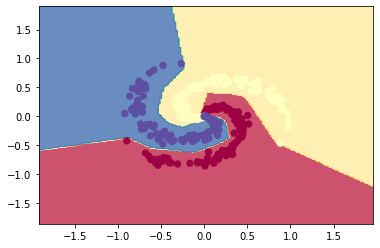

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid

y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()